In [1]:
%cd ..

c:\Projects\Groningen-Waste-Collection


# Managerial insights

In [2]:
import glob
import json

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

## Loading the data

In [3]:
def load(files: list[str]) -> pd.DataFrame:
    data = []
    for file in files:
        with open(file, "r") as fh:
            data.append(json.load(fh))
    
    df = pd.DataFrame(data)
    df["experiment"] = range(1, len(files) + 1)
    df["avg_distance_per_day"] = df["avg_route_distance"] * df["avg_num_routes_per_day"]

    return df

In [4]:
greedy = load(sorted(glob.glob("out/greedy_*.json")))
greedy

,avg_excess_volume,avg_fill_factor,avg_num_arrivals_between_service,avg_num_routes_per_day,avg_route_clusters,avg_route_distance,avg_route_duration,avg_route_stops,avg_service_level,num_arrivals_per_hour,num_arrivals,num_services,num_unserved_containers,experiment,avg_distance_per_day
0,368.106527,0.930391,87.597699,3.682192,63.250744,61797.906250,7:09:32.710565,67.894345,0.769096,"[48281, 24374, 14076, 11095, 9588, 17411, 4775...",7993270,91250,5,1,227551.742466
1,368.709289,0.930172,87.598542,3.687671,63.092868,61535.683507,7:09:04.359584,67.793462,0.769819,"[48585, 24427, 14136, 10909, 9487, 17557, 4771...",7992710,91250,5,2,226923.369863
2,369.434447,0.930593,87.604701,3.734247,62.283199,60949.438004,7:03:37.605282,66.947909,0.768964,"[48196, 24451, 14044, 10631, 9630, 17659, 4807...",7994345,91250,5,3,227600.230137
3,368.692794,0.929984,87.570477,3.731507,62.354626,60880.716593,7:03:43.229809,66.997063,0.769830,"[49042, 24432, 14038, 10682, 9494, 17452, 4759...",7989521,91250,5,4,227176.810959
4,368.154221,0.930301,87.602433,3.750685,62.146092,60749.204529,7:02:18.178232,66.654492,0.769633,"[48232, 24663, 13934, 10876, 9566, 17679, 4792...",7994451,91250,5,5,227851.126027
5,366.606206,0.929455,87.515704,3.712329,62.636900,61427.036162,7:06:13.489299,67.343173,0.771200,"[48255, 24407, 14167, 10860, 9527, 17455, 4807...",7985408,91250,5,6,228037.353425
6,365.321995,0.930122,87.576997,3.682192,63.232887,61753.313244,7:09:21.989583,67.894345,0.769677,"[48387, 24252, 14020, 10916, 9730, 17630, 4827...",7991493,91250,5,7,227387.542466
7,366.831589,0.930859,87.657633,3.698630,62.944444,61464.964444,7:07:32.065185,67.592593,0.766312,"[48614, 24250, 14139, 10878, 9556, 17179, 4788...",7998710,91250,5,8,227336.169863
8,369.197647,0.929896,87.560745,3.704110,62.798077,61436.482249,7:07:01.383876,67.492604,0.770005,"[48535, 24369, 14088, 10759, 9581, 17268, 4791...",7989848,91250,5,9,227567.463014
9,369.677370,0.929928,87.565227,3.731507,62.340675,60992.169604,7:03:52.776065,66.997063,0.770838,"[48608, 24332, 14118, 10909, 9591, 17547, 4711...",7990644,91250,5,10,227592.698630


In [5]:
baseline = load(sorted(glob.glob("out/baseline_*.json")))
baseline

,avg_excess_volume,avg_fill_factor,avg_num_arrivals_between_service,avg_num_routes_per_day,avg_route_clusters,avg_route_distance,avg_route_duration,avg_route_stops,avg_service_level,num_arrivals_per_hour,num_arrivals,num_services,num_unserved_containers,experiment,avg_distance_per_day
0,348.389144,0.930465,87.602323,3.701370,62.792006,61468.544041,7:07:39.301258,67.542561,0.772132,"[48281, 24374, 14076, 11095, 9588, 17411, 4775...",7993270,91250,5,1,227517.816438
1,346.152239,0.930049,87.586740,3.726027,62.462500,61187.896324,7:04:46.902206,67.095588,0.773688,"[48585, 24427, 14136, 10909, 9487, 17557, 4771...",7992710,91250,5,2,227987.778082
2,347.635826,0.930659,87.610203,3.682192,63.112351,61747.640625,7:09:36.609375,67.894345,0.771814,"[48196, 24451, 14044, 10631, 9630, 17659, 4807...",7994345,91250,5,3,227366.654795
3,346.134792,0.929905,87.562148,3.728767,62.360764,61111.785452,7:04:30.420279,67.046289,0.773852,"[49042, 24432, 14038, 10682, 9494, 17452, 4759...",7989521,91250,5,4,227871.616438
4,346.910090,0.930366,87.609688,3.723288,62.529065,61068.798381,7:04:39.211921,67.144960,0.773425,"[48232, 24663, 13934, 10876, 9566, 17679, 4792...",7994451,91250,5,5,227376.704110
5,348.491357,0.929358,87.508581,3.739726,62.245421,61040.638095,7:03:30.817582,66.849817,0.775079,"[48255, 24407, 14167, 10860, 9527, 17455, 4807...",7985408,91250,5,6,228275.263014
6,348.551809,0.930101,87.575277,3.706849,62.864006,61386.671840,7:07:09.525499,67.442720,0.772274,"[48387, 24252, 14020, 10916, 9730, 17630, 4827...",7991493,91250,5,7,227551.142466
7,348.882348,0.930853,87.656997,3.687671,63.061664,61667.438336,7:09:00.925706,67.793462,0.770290,"[48614, 24250, 14139, 10878, 9556, 17179, 4788...",7998710,91250,5,8,227409.238356
8,349.268162,0.929910,87.561205,3.698630,62.844444,61520.536296,7:08:00.083704,67.592593,0.772384,"[48535, 24369, 14088, 10759, 9581, 17268, 4791...",7989848,91250,5,9,227541.709589
9,346.761873,0.929919,87.561841,3.747945,62.024854,60744.260234,7:02:08.678363,66.703216,0.774849,"[48608, 24332, 14118, 10909, 9591, 17547, 4711...",7990644,91250,5,10,227666.158904


In [6]:
prize = load(sorted(glob.glob("out/prize_*.json")))
prize

,avg_excess_volume,avg_fill_factor,avg_num_arrivals_between_service,avg_num_routes_per_day,avg_route_clusters,avg_route_distance,avg_route_duration,avg_route_stops,avg_service_level,num_arrivals_per_hour,num_arrivals,num_services,num_unserved_containers,experiment,avg_distance_per_day
0,1011.007443,0.613776,57.788613,4.198847,69.571723,56080.672615,8:20:23.050789,90.282086,0.865426,"[46186, 22967, 13447, 10417, 9250, 16634, 4559...",7601292,131541,4,1,235474.178674
1,1002.978380,0.620919,58.461154,4.126404,69.886998,56487.617427,8:23:08.957794,90.721579,0.864628,"[46984, 24098, 13731, 10561, 9338, 17199, 4662...",7794417,133270,4,2,233090.758427
2,990.201684,0.591698,55.714254,4.376471,68.818548,55391.601478,8:16:56.675403,89.827957,0.876459,"[44986, 22962, 13021, 10097, 8998, 16381, 4482...",7446038,133664,4,3,242419.714706
3,998.830482,0.593195,55.857605,4.382353,68.514094,55251.302685,8:15:01.925503,89.471141,0.878353,"[44921, 22706, 13295, 10198, 9013, 16380, 4472...",7447213,133312,4,4,242130.708824
4,1002.610574,0.593434,55.873097,4.352941,68.777027,55161.595946,8:16:14.563514,89.933784,0.876155,"[45327, 22622, 12994, 10062, 8923, 16310, 4448...",7443187,133102,4,5,240115.182353
5,1007.778043,0.598012,56.313107,4.323529,68.959184,55304.641497,8:16:43.525170,89.936735,0.871989,"[45326, 22605, 13164, 10064, 8946, 16252, 4469...",7443313,132207,4,6,239111.244118
6,999.877635,0.624530,58.803968,4.116343,69.722073,56145.701211,8:21:35.615074,90.417900,0.858523,"[47880, 24317, 13792, 10683, 9397, 16925, 4731...",7901989,134361,4,7,231114.991690
7,1007.968540,0.630686,59.379949,4.058333,69.953457,56683.044490,8:24:22.056126,90.829569,0.859331,"[48003, 24172, 14004, 10592, 9620, 17309, 4689...",7879031,132702,4,8,230038.688889
8,999.435979,0.629626,59.281566,4.066482,70.134196,56563.099455,8:23:50.447548,90.804496,0.857158,"[47856, 24183, 14222, 10700, 9408, 17176, 4739...",7904311,133301,4,9,230012.825485
9,1015.786702,0.627456,59.090580,4.080332,69.913103,56540.887305,8:23:30.659878,90.733198,0.857336,"[48016, 24120, 13846, 10596, 9436, 17256, 4730...",7905215,133650,4,10,230705.614958


## Average distance vs. service level

The figure below compares average distance traveled per day (the total distance of all routes on a day) against the average service level that's achieved by a strategy.
Typically, as the distance increases, the service level should go up: more containers are visited, etc.
The key is to balance the two.

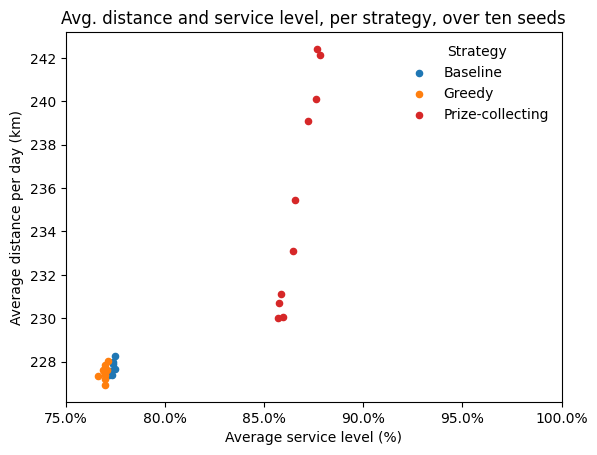

In [7]:
_, ax = plt.subplots()

baseline.plot.scatter(
    x="avg_service_level",
    y="avg_distance_per_day", 
    ax=ax,
    label="Baseline",
    color="tab:blue"
)

greedy.plot.scatter(
    x="avg_service_level",
    y="avg_distance_per_day",
    ax=ax,
    label="Greedy",
    color="tab:orange"
)

prize.plot.scatter(
    x="avg_service_level",
    y="avg_distance_per_day",
    ax=ax,
    label="Prize-collecting",
    color="tab:red"  
)

ticks = mtick.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1_000))
ax.yaxis.set_major_formatter(ticks)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim([0.75, 1])

ax.legend(frameon=False, title="Strategy")
ax.set_title("Avg. distance and service level, per strategy, over ten seeds")
ax.set_xlabel("Average service level (%)")
ax.set_ylabel("Average distance per day (km)");


## Route consolidation

The following plot compares the number of visited clusters (a group of containers in the same location) with the actual number of visited containers.
If the two are quite similar, that means very little consolidation is going on: only a single container is emptied in a cluster.
If they're pretty far apart, the strategy typically visits multiple containers in the same cluster.

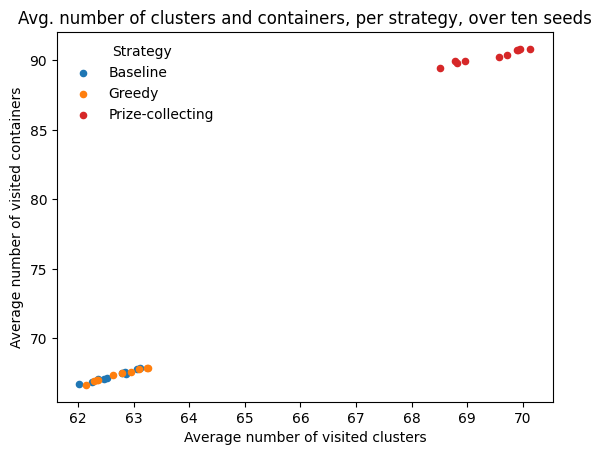

In [8]:
_, ax = plt.subplots()

baseline.plot.scatter(
    x="avg_route_clusters",
    y="avg_route_stops", 
    ax=ax,
    label="Baseline",
    color="tab:blue"
)

greedy.plot.scatter(
    x="avg_route_clusters",
    y="avg_route_stops",
    ax=ax,
    label="Greedy",
    color="tab:orange"
)

prize.plot.scatter(
    x="avg_route_clusters",
    y="avg_route_stops",
    ax=ax,
    label="Prize-collecting",
    color="tab:red"  
)

ax.legend(frameon=False, title="Strategy")
ax.set_title("Avg. number of clusters and containers, per strategy, over ten seeds")
ax.set_xlabel("Average number of visited clusters")
ax.set_ylabel("Average number of visited containers");